# Tarefa EaD1

#### Professor: Mauro Castro
#### Estudante: Clístenes Grizafis Bento

xercício 1: Visualizando dados do Global Cancer Observatory (GCO)

Para responder a questão abaixo, considere o conjunto de dados disponível no seguinte endereço da internet:

http://gco.iarc.fr/

O Global Cancer Observatory (GCO) é uma plataforma web focada na apresentação de dados estatísticos sobre controle e pesquisa do câncer. Entre na seção Cancer Tomorrow sobre previsão de incidência de câncer de mama para o ano de 2040, dividido por regiões (i.e. dados não agrupados). Faça o download dos dados no formato .csv, importe para o RStudio, e organize os dados em um data.frame. Observe que os dados de entrada podem necessitar ajustes, por exemplo, remoção de espaços ou caracteres não compatíveis com o tipo de dado a ser importado.

PROPOSTA: Utilizando as ferramentas gráficas disponíveis na base do R, proponha um conjunto de gráficos e estratégias de visualização para explorarmos os dados de incidência de câncer no mundo.

FORMA DE ENVIO: Arquivo PDF

REFERÊNCIAS

Global Cancer Observatory (GCO). A tool that predicts the future cancer incidence and mortality burden worldwide from the current estimates in 2020 up until 2040. <http://gco.iarc.fr/>

### Instalando e importando bibliotecas

In [98]:
# Bibliotecas fornecidas pelo professor

#library(TreeAndLeaf) # Pacote Bioconductor
library(RedeR) # Pacote Bioconductor
library(RColorBrewer)  # Pacote CRAN
library(igraph)  # Pacote CRAN
library(SummarizedExperiment) # Pacote Bioconductor
library(ComplexHeatmap) # Pacote Bioconductor
library(circlize) # Pacote CRAN
library(RColorBrewer)  # Pacote CRAN
library(survival)  # Pacote CRAN
library(survminer)  # Pacote CRAN
library(shiny)  # Pacote CRAN



ERROR: Error in library(RedeR): there is no package called 'RedeR'


In [99]:
# Outras bibliotecas
library(ggplot2)

### Importando dados

In [100]:
data.df <- read.csv(file = "./data/cancer_de_mama.csv")
head(data.df)

Cancer.id,Cancer.label,Population.id,Population,Sex,Type,Cases.base.in.2020,Year,Prediction,Change.in.number.of.cases,Change.in.number.of.cases.due.to.population,Change.in.number.of.cases.due.to.risk
20,Breast,903,Africa,0,0,186598,2020,186598,0,0.0000,0
20,Breast,903,Africa,0,0,186598,2025,218523,31925,17.1090,0
20,Breast,903,Africa,0,0,186598,2030,255607,69009,36.9827,0
20,Breast,903,Africa,0,0,186598,2035,298224,111626,59.8216,0
20,Breast,903,Africa,0,0,186598,2040,346587,159989,85.7399,0
20,Breast,904,Latin America and Caribbean,0,0,210100,2020,210100,0,0.0000,0


### Montando dataframe com dados selecionados para o gráfico

In [101]:
#cancer_de_mama.df <- data.frame("população"= data.df$Population[data.df$Year == 2020 || data.df$Year == 2040], "casos_2020" = data.df$Prediction[data.df$Year == 2020], "casos_2040" = data.df$Prediction[data.df$Year == 2040], "Diferença_em_Porc" = (data.df$Prediction[data.df$Year == 2040]-data.df$Prediction[data.df$Year == 2020])*100/data.df$Prediction[data.df$Year == 2020])

verifica_ano <- (data.df$Year == 2020 | data.df$Year == 2040)
ano <- data.df$Year[verifica_ano]
cancer_de_mama.df <- data.frame("população"= data.df$Population[verifica_ano], "ano"=data.df$Year[verifica_ano],"numero_de_casos"=data.df$Prediction[verifica_ano])

cancer_de_mama.df$ano[cancer_de_mama.df$ano == 2020] = "ano 2020"
cancer_de_mama.df$ano[cancer_de_mama.df$ano == 2040] = "ano 2040"

cancer_de_mama.df

população,ano,numero_de_casos
Africa,ano 2020,186598
Africa,ano 2040,346587
Latin America and Caribbean,ano 2020,210100
Latin America and Caribbean,ano 2040,314356
Northern America,ano 2020,281591
Northern America,ano 2040,343676
Europe,ano 2020,531086
Europe,ano 2040,568439
Oceania,ano 2020,25873
Oceania,ano 2040,35935


### Salvando nova base de dados

In [102]:
save(cancer_de_mama.df,file = "./data/cancer_de_mama.RData")

### Plotando Gráfico

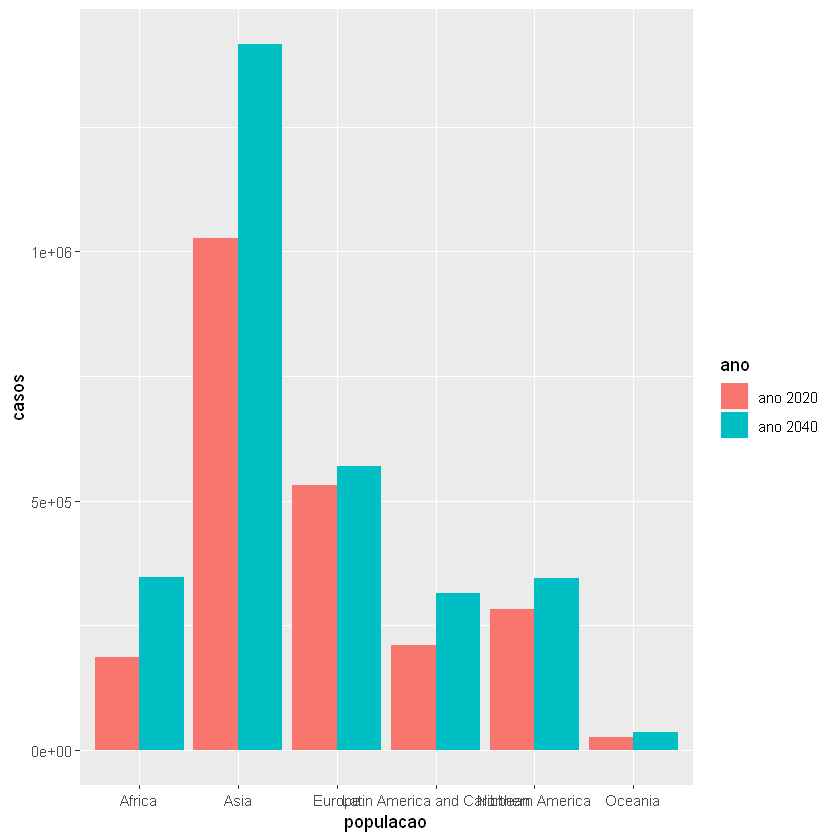

In [103]:
ano <- cancer_de_mama.df$ano
casos <- cancer_de_mama.df$numero_de_casos
populacao <- cancer_de_mama.df$população

ggplot(cancer_de_mama.df, aes(fill=ano, y=casos, x=populacao)) + 
    geom_bar(position="dodge", stat="identity")